In [ ]:
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 

Suponha que você tenha feito vários cenários para a previsão de um indicador econômico. Faça o gráfico do intervalo de confiança para a estimativa média desse indicador. Use diferentes quantidades de amostras para a estimação do valor médio do indicador a cada instante de tempo e faça o gráfico da média e do intervalo de confiança. 

In [ ]:
def forecasts(n, sigma=1.0):
  return 10*(1 - 1/np.exp(np.linspace(0,40,n))) + np.random.normal(0, sigma, n)

In [ ]:
y1 = forecasts(1000)
y2 = forecasts(1000)
y3 = forecasts(1000)
y4 = forecasts(1000)

y_mean = (y1 + y2 + y3 + y4)/4

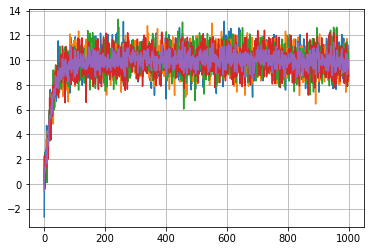

In [ ]:
plt.grid()
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.plot(y4)
#plt.plot(y_mean)

In [ ]:
X_forecast = []
for i in range(10000):
  X_forecast.append(forecasts(100, sigma=1.0))

np_forecast = np.array(X_forecast)

In [ ]:
np_forecast.shape

(10000, 100)

In [ ]:
mean_ = np.mean(np_forecast,axis=0)

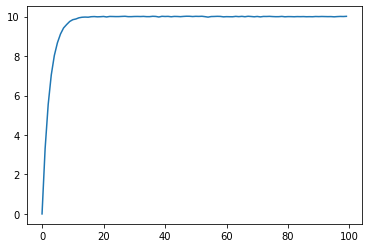

In [ ]:
plt.plot(mean_)

In [ ]:
mean_ = np.mean(np_forecast,axis=0)
std_ = np.std(np_forecast,axis=0)

conf_ = 1.96*std_/np.sqrt(1000)

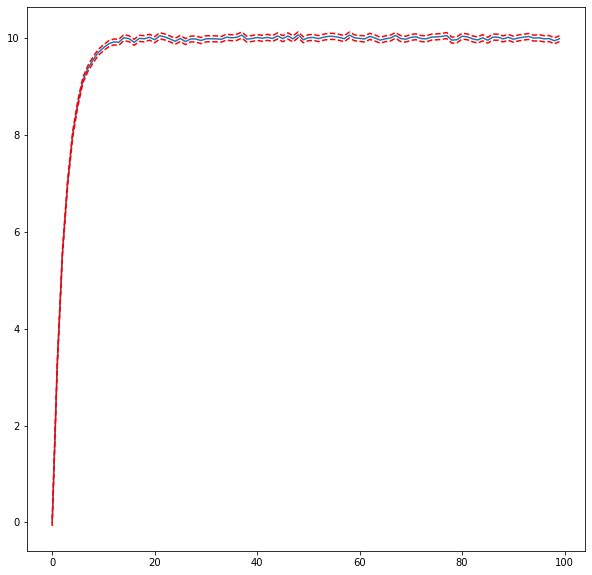

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(mean_) 
plt.plot(mean_ + conf_, '--r') 
plt.plot(mean_ - conf_, '--r')

Lembrete: o mesmo vale quando queremos calcular a estimativa média e o intervalo de confiança para a previsão de uma série temporal usando algum modelo de Machine Learning (ou algum método estatístico). 

Seja uma distribuição lognormal, com a função mostrada abaixo.

f(x, $\mu$, $\theta$) = $\frac{1}{x\sqrt{2\pi\theta}}$ $e^{-\frac{1}{2\theta}(ln(x) - \mu)}$

Vamos supor que a média dessa distribuição é dada $\mu = 0$ e queremos estimar o parâmetro desconhecido $\theta$. Não chegamos (e nem iremos nesse curso) mostrar como se determina a função matemática desses estimadores, que geralmente é feito utilizando métodos de momentos ou máxima verossimilhança. 

Contudo, não tem problema nesse caso. Como essas distribuições são conhecidas, podemos apenas pesquisar quais são tais estimadores. 
Procure na internet qual é o estimador para tal parâmetro. Em seguida, calcule qual é o valor estimado desse parâmetro.



In [ ]:
rng = np.random.random(1)
lognorm = stats.lognorm(np.sqrt(rng))

In [ ]:
rng

array([0.33003501])

In [ ]:
values = lognorm.rvs(size=20000)

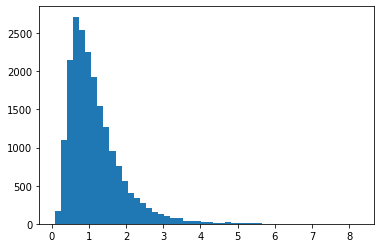

In [ ]:
plt.hist(values,bins=50);

Faça uma simulação de Monte Carlo para investigar a estimativa média do parâmetro desconhecido. Como você possui 20000 valores dessa distribuição, faça 100 simulações com 200 amostras cada. Faça o gráfico da média da estimativa em função das simulações 

Vemos no início da aula que podemos estabelecer um intervalo de confiança para a estimação do desvio padrão de uma distribuição normal. Vamos verificar empiricamente como isso funciona. 

Lembrando que:

$P(\frac{(n-1)S^2}{\chi^2_{\alpha/2,n-1}} \le \sigma^2 \le \frac{(n-1)S^2}{\chi^2_{1-\alpha/2,n-1}}) = 1-\alpha$

Construa um intervalo de confiança para esse parâmetro, supondo $\alpha$ = 0.05 e um tamanho de amostras igual a 200.

Rode essa subamostragem 100 vezes e determine a quantidade de vezes no qual a estimativa está dentro do intervalo de confiança